# How are in-demand skills trending for Data Analysts?

### Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [ ]:
# Importing Libraries
import pandas as pd 
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [72]:
# Filter data to Mexico and Data Analyst roles
df_DA_Mex = df[(df['job_country'] == 'Mexico') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_Mex

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
428,Data Analyst,(cen) cemex go data analyst,"San Pedro Garza García, Nuevo Leon, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-04-26 13:40:27,False,False,Mexico,None,NaN,NaN,CEMEX,"[go, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
801,Data Analyst,Advanced Analytics Manager,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-07 13:15:01,False,False,Mexico,None,NaN,NaN,Demo - Coca-Cola,"[python, azure]","{'cloud': ['azure'], 'programming': ['python']}"
2212,Data Analyst,Oliver Wyman- Celent- Data Analyst,"Mexico City, CDMX, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-11 13:19:49,False,False,Mexico,None,NaN,NaN,Marsh McLennan,"[sql, vba, python, r, powerpoint]","{'analyst_tools': ['powerpoint'], 'programming..."
3241,Data Analyst,Data and Analytics Analyst,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-12-31 13:25:23,False,False,Mexico,None,NaN,NaN,PepsiCo,"[sql, vba, tableau, powerbi, dax, power bi, ex...","{'analyst_tools': ['tableau', 'powerbi', 'dax'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785260,Data Analyst,Sales Compensation Data Analyst,"Tlaquepaque, Jalisco, Mexico","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Mexico,2023-11-09 06:47:06,False,False,Mexico,None,NaN,NaN,Micro Focus,None,None
785440,Data Analyst,Database Analyst,"Guadalajara, Jalisco, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-15 06:17:56,True,False,Mexico,None,NaN,NaN,Jabil,[flow],{'other': ['flow']}
785566,Data Analyst,Data and Analytics Platforms and Infrastructure,"Ciudad Cuauhtemoc, Chihuahua, Mexico",via LinkedIn,Full-time,False,Mexico,2023-01-13 06:42:36,False,False,Mexico,None,NaN,NaN,HSBC,"[python, r, sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['py..."
785602,Data Analyst,Data Analysis Manager,"Chihuahua, Mexico","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Mexico,2023-10-05 06:17:19,True,False,Mexico,None,NaN,NaN,BairesDev,None,None


In [73]:
# create another row with the posted month number
df_DA_Mex['job_posted_month_no'] = df_DA_Mex['job_posted_date'].dt.month


In [74]:
df_DA_Mex_explode = df_DA_Mex.explode('job_skills')
df_DA_Mex_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785602,Data Analyst,Data Analysis Manager,"Chihuahua, Mexico","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Mexico,2023-10-05 06:17:19,True,False,Mexico,None,NaN,NaN,BairesDev,None,None,10
785627,Data Analyst,Dcs Real Estate Analyst,"Monterrey, Nuevo Leon, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-15 06:18:00,False,False,Mexico,None,NaN,NaN,Msci Inc,vba,"{'analyst_tools': ['excel', 'power bi'], 'prog...",1
785627,Data Analyst,Dcs Real Estate Analyst,"Monterrey, Nuevo Leon, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-15 06:18:00,False,False,Mexico,None,NaN,NaN,Msci Inc,python,"{'analyst_tools': ['excel', 'power bi'], 'prog...",1
785627,Data Analyst,Dcs Real Estate Analyst,"Monterrey, Nuevo Leon, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-15 06:18:00,False,False,Mexico,None,NaN,NaN,Msci Inc,excel,"{'analyst_tools': ['excel', 'power bi'], 'prog...",1


In [75]:
df_DA_Mex_pivot = df_DA_Mex_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_Mex_pivot.loc['Total'] = df_DA_Mex_pivot.sum()

df_DA_Mex_pivot= df_DA_Mex_pivot[df_DA_Mex_pivot.loc['Total'].sort_values(ascending=False).index]  # pass the index

df_DA_Mex_pivot = df_DA_Mex_pivot.drop('Total')

In [76]:
DA_totals = df_DA_Mex.groupby('job_posted_month_no').size()

In [77]:
df_DA_Mex_percent = df_DA_Mex_pivot.div(DA_totals/100, axis=0)

In [78]:
df_DA_Mex_percent

job_skills,sql,excel,python,tableau,power bi,r,sap,sas,oracle,azure,...,couchbase,couchdb,redis,fortran,typescript,powerbi,sqlserver,terraform,airtable,pytorch
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,41.971831,34.366197,31.830986,21.971831,19.154930,13.802817,10.422535,10.140845,5.915493,3.943662,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.28169
2,36.551724,37.241379,25.517241,22.758621,20.000000,8.965517,10.344828,16.551724,8.275862,6.206897,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,39.743590,39.102564,29.487179,30.128205,24.358974,17.948718,9.615385,14.102564,7.692308,6.410256,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,36.477987,48.427673,24.528302,18.238994,23.270440,11.320755,13.207547,11.320755,7.547170,3.144654,...,0.00000,0.00000,0.628931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,42.948718,40.384615,35.256410,23.717949,14.743590,18.589744,7.692308,12.820513,4.487179,7.692308,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,42.173913,40.434783,23.913043,18.695652,23.478261,10.434783,10.869565,13.913043,4.782609,4.782609,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.434783,0.000000,0.000000,0.00000
7,46.456693,40.944882,32.283465,23.228346,22.834646,15.748031,10.236220,12.598425,5.511811,6.299213,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,50.000000,43.870968,30.645161,22.580645,21.935484,14.193548,13.548387,10.967742,6.451613,6.774194,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322581,0.000000,0.00000
9,49.099099,38.288288,34.684685,24.774775,22.972973,18.018018,8.108108,8.108108,3.153153,8.558559,...,0.45045,0.45045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [79]:
# changes month number to month name
df_DA_Mex_percent = df_DA_Mex_percent.reset_index()
df_DA_Mex_percent['job_posted_month'] = df_DA_Mex_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Mex_percent = df_DA_Mex_percent.set_index('job_posted_month')
df_DA_Mex_percent = df_DA_Mex_percent.drop(columns='job_posted_month_no')

df_DA_Mex_percent

job_skills,sql,excel,python,tableau,power bi,r,sap,sas,oracle,azure,...,couchbase,couchdb,redis,fortran,typescript,powerbi,sqlserver,terraform,airtable,pytorch
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.971831,34.366197,31.830986,21.971831,19.154930,13.802817,10.422535,10.140845,5.915493,3.943662,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.28169
Feb,36.551724,37.241379,25.517241,22.758621,20.000000,8.965517,10.344828,16.551724,8.275862,6.206897,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Mar,39.743590,39.102564,29.487179,30.128205,24.358974,17.948718,9.615385,14.102564,7.692308,6.410256,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Apr,36.477987,48.427673,24.528302,18.238994,23.270440,11.320755,13.207547,11.320755,7.547170,3.144654,...,0.00000,0.00000,0.628931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
May,42.948718,40.384615,35.256410,23.717949,14.743590,18.589744,7.692308,12.820513,4.487179,7.692308,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Jun,42.173913,40.434783,23.913043,18.695652,23.478261,10.434783,10.869565,13.913043,4.782609,4.782609,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.434783,0.000000,0.000000,0.00000
Jul,46.456693,40.944882,32.283465,23.228346,22.834646,15.748031,10.236220,12.598425,5.511811,6.299213,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Aug,50.000000,43.870968,30.645161,22.580645,21.935484,14.193548,13.548387,10.967742,6.451613,6.774194,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322581,0.000000,0.00000
Sep,49.099099,38.288288,34.684685,24.774775,22.972973,18.018018,8.108108,8.108108,3.153153,8.558559,...,0.45045,0.45045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


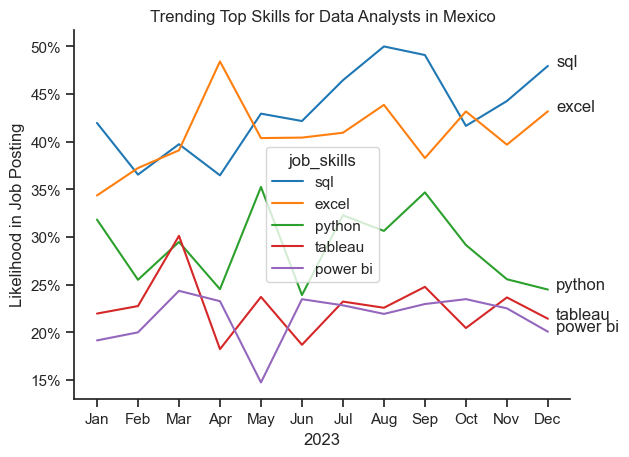

In [80]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_Mex_percent.iloc[:, :5]  # all rows, first 5 values

sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Mexico')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()